In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Preparation**

In [2]:
# import dataset
# review head

df = pd.read_csv('https://data.ontario.ca/dataset/1f14addd-e4fc-4a07-9982-ad98db07ef86/resource/4cc07c1b-62ed-4ece-a2a4-d05d0f45081c/download/img-wage-rate-by-edu-age-sex-ft-pt-ca-on-2006-24.csv')

Exploratory Data Analytics Report generated previously.

Download the report from the project GitHub: https://github.com/jammaro14-sys/CIND820

In [3]:
# some column names have leading space; identify to be renamed
for col in df.columns:
  if col.startswith(' '):
    print(f"Column '{col}' has a leading space.")

Column ' Men' has a leading space.
Column ' Women' has a leading space.


In [4]:
# Rename the ' Men' column to 'Men Wage' and ' Women' to 'Women Wage' to remove
# leading space and add clarity
df_renamed = df.rename(columns={' Men': 'Men_Wage', ' Women': 'Women_Wage'})

# Display the first few rows to show the renamed columns
display(df_renamed.head())

,YEAR,GEOGRAPHY,IMMIGRANT,TYPE OF WORK,WAGE RATE,EDUCATION,AGE GROUP,Both sexes,Men_Wage,Women_Wage
0,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",15 +,17.5,19.2,16.0
1,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 +,19.4,21.5,17.5
2,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 34,18.0,19.0,16.8
3,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 54,19.5,21.5,17.8
4,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 64,19.5,21.5,17.6


In [5]:
# check for NA values

df_renamed.isna().sum()

,0
YEAR,0
GEOGRAPHY,0
IMMIGRANT,0
TYPE OF WORK,0
WAGE RATE,0
EDUCATION,0
AGE GROUP,0
Both sexes,0
Men_Wage,0
Women_Wage,0


In [6]:
# check for NULL values

df_renamed.isnull().sum()


,0
YEAR,0
GEOGRAPHY,0
IMMIGRANT,0
TYPE OF WORK,0
WAGE RATE,0
EDUCATION,0
AGE GROUP,0
Both sexes,0
Men_Wage,0
Women_Wage,0


There are no NA or NULL values in the dataset. However, the Exploratory Data Analysis (EDA) Report identified 0's in the 'Men' and 'Women' variables.

'Men' has 6030 intances of "0.0", while 'Women' has 5236 instances.

According to the contextual document for this dataset, "Statistics Canada suppresses estimates below 1,500 - values shown as "0.0". Missing values shown as "-"." (Stastics Canada, 2025).

So these "0.0", may not be true zeroes, but instead may represent an underrepresented group.


As the "0.0" will lower our averages, we will not use them in our analysis.

In [7]:
# change "0.0" in dataset to NaN and flag as suppressed
for col in ['Men_Wage', 'Women_Wage']:
    # Create a new column to flag suppressed values for each gender
    df_renamed[f'{col}_is_suppressed'] = df_renamed[col].astype(str).str.strip() == "0.0"
    # Replace "0.0" strings with np.nan
    df_renamed[col] = df_renamed[col].replace('0.0', np.nan)

# Display the first few rows to show the new columns and replaced values
display(df_renamed.head())

,YEAR,GEOGRAPHY,IMMIGRANT,TYPE OF WORK,WAGE RATE,EDUCATION,AGE GROUP,Both sexes,Men_Wage,Women_Wage,Men_Wage_is_suppressed,Women_Wage_is_suppressed
0,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",15 +,17.5,19.2,16.0,False,False
1,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 +,19.4,21.5,17.5,False,False
2,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 34,18.0,19.0,16.8,False,False
3,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 54,19.5,21.5,17.8,False,False
4,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 64,19.5,21.5,17.6,False,False


## **Research Questions 1**

Confirm the existence of the gender wage gap in Ontario.

Method: Compare mean and median wages by gender, use measure of dispersion (e.g. standard deviation) to assess wage variability and apply T-test to determine if the difference between genders is statistically significant.

In [8]:
# Filter for Ontario
df_ontario = df_renamed[df_renamed['GEOGRAPHY'] == ' Ontario']

print(df_ontario)


       YEAR GEOGRAPHY        IMMIGRANT   TYPE OF WORK             WAGE RATE  \
1080   2006   Ontario            Total  All employees    Median hourly wage   
1081   2006   Ontario            Total  All employees    Median hourly wage   
1082   2006   Ontario            Total  All employees    Median hourly wage   
1083   2006   Ontario            Total  All employees    Median hourly wage   
1084   2006   Ontario            Total  All employees    Median hourly wage   
...     ...       ...              ...            ...                   ...   
41035  2024   Ontario   Born in Canada      Part-time    Median hourly wage   
41036  2024   Ontario   Born in Canada      Part-time    Median hourly wage   
41037  2024   Ontario   Born in Canada      Part-time    Median hourly wage   
41038  2024   Ontario   Born in Canada      Part-time    Median hourly wage   
41039  2024   Ontario   Born in Canada      Part-time    Median hourly wage   

                         EDUCATION AGE GROUP  Both 

In [9]:
# multiple wage values per year for Men and Women

# Calculate average wage of Men in Ontario by year, filtering out surpressed values
mean_men_wage_ontario_by_year = df_ontario[df_ontario['Men_Wage_is_suppressed'] == False].groupby('YEAR')['Men_Wage'].mean()
print(mean_men_wage_ontario_by_year)

YEAR
2006    19.573448
2007    19.916628
2008    20.840629
2009    20.779425
2010    21.115890
2011    21.496108
2012    21.786804
2013    21.752302
2014    22.361557
2015    22.909771
2016    23.580072
2017    24.359641
2018    24.354215
2019    25.171512
2020    26.998609
2021    27.773789
2022    28.299773
2023    29.504363
2024    30.153846
Name: Men_Wage, dtype: float64


In [10]:
# Calculate average wage of Women in Ontario by year, filtering out surpressed values
mean_women_wage_ontario_by_year = df_ontario[df_ontario['Women_Wage_is_suppressed'] == False].groupby('YEAR')['Women_Wage'].mean()
print(mean_women_wage_ontario_by_year)

YEAR
2006    16.544607
2007    17.008758
2008    17.540894
2009    18.074103
2010    18.113158
2011    18.439391
2012    18.551525
2013    18.976190
2014    18.830310
2015    19.478176
2016    20.145688
2017    20.089408
2018    20.838391
2019    21.483449
2020    23.143099
2021    23.894471
2022    24.163075
2023    25.499547
2024    26.261702
Name: Women_Wage, dtype: float64


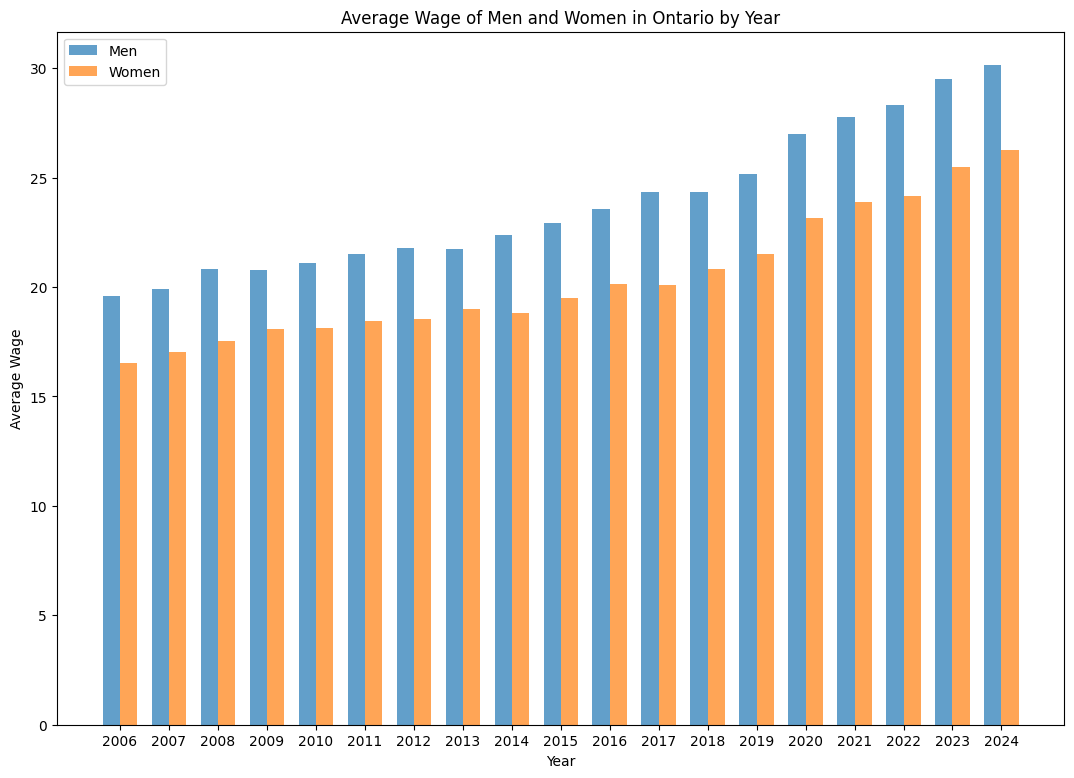

In [11]:
# Plot side-by-side bar graph comparing the mean wage of men and women in ontario by year

bar_width = 0.35
r1 = mean_men_wage_ontario_by_year.index
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(13, 9))
plt.bar(r1, mean_men_wage_ontario_by_year.values, width=bar_width, label='Men', alpha=0.7)
plt.bar(r2, mean_women_wage_ontario_by_year.values, width=bar_width, label='Women', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Average Wage')
plt.title('Average Wage of Men and Women in Ontario by Year')
plt.xticks([r + bar_width/2 for r in r1], r1) # Set x-axis ticks to be in the middle of the two bars
plt.legend()
plt.show()

In [12]:
# Calculate median wage of men in Ontario by year, filtering out supressed values
median_men_wage_ontario_by_year = df_ontario[df_ontario['Men_Wage_is_suppressed'] == False].groupby('YEAR')['Men_Wage'].median()
print(median_men_wage_ontario_by_year)

YEAR
2006    18.50
2007    18.80
2008    20.00
2009    19.90
2010    20.00
2011    20.00
2012    20.00
2013    20.00
2014    20.65
2015    21.60
2016    21.55
2017    22.90
2018    22.00
2019    23.50
2020    25.00
2021    26.00
2022    25.00
2023    27.00
2024    27.80
Name: Men_Wage, dtype: float64


In [13]:
# Calculate median wage of women in Ontario by year, filtering out supressed values
median_women_wage_ontario_by_year = df_ontario[df_ontario['Women_Wage_is_suppressed'] == False].groupby('YEAR')['Women_Wage'].median()
print(median_women_wage_ontario_by_year)

YEAR
2006    15.00
2007    15.00
2008    16.40
2009    17.00
2010    16.60
2011    17.00
2012    16.80
2013    17.75
2014    17.00
2015    18.00
2016    18.95
2017    18.00
2018    19.00
2019    19.55
2020    21.05
2021    22.00
2022    23.00
2023    25.00
2024    24.00
Name: Women_Wage, dtype: float64


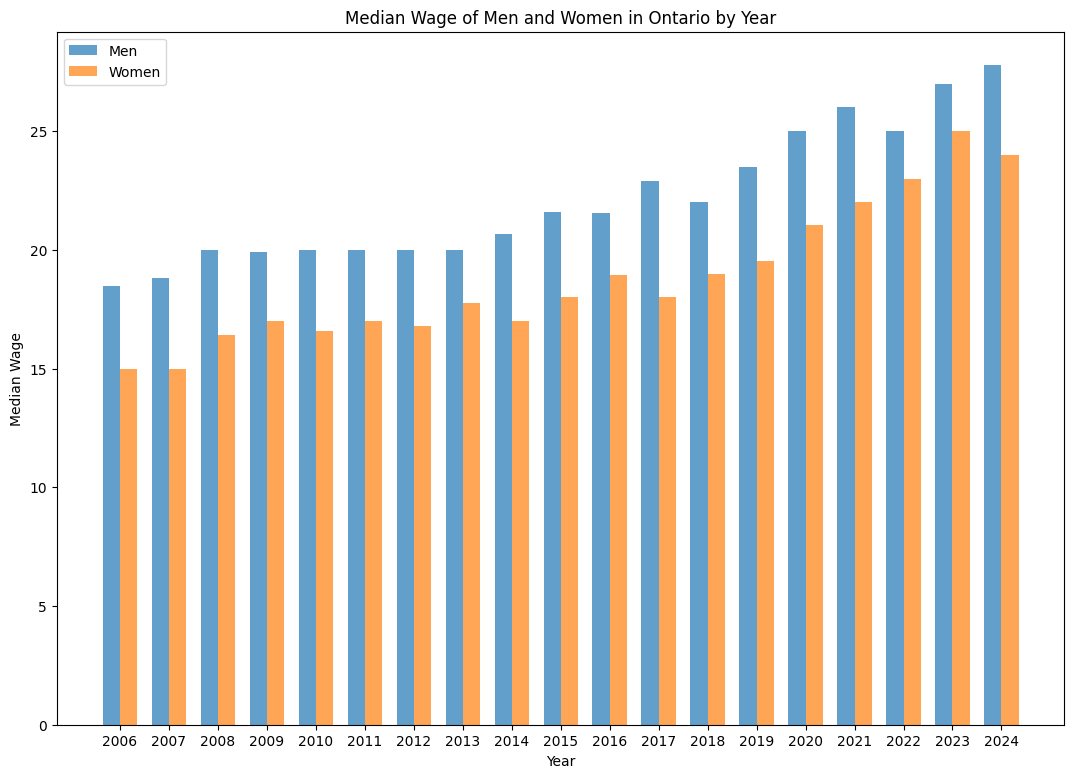

In [14]:
# Plot side-by-side bar graph comparing the median wage of men and women in ontario by year

bar_width = 0.35
r1 = median_men_wage_ontario_by_year.index
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(13, 9))
plt.bar(r1, median_men_wage_ontario_by_year.values, width=bar_width, label='Men', alpha=0.7)
plt.bar(r2, median_women_wage_ontario_by_year.values, width=bar_width, label='Women', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Median Wage')
plt.title('Median Wage of Men and Women in Ontario by Year')
plt.xticks([r + bar_width/2 for r in r1], r1) # Set x-axis ticks to be in the middle of the two bars
plt.legend()
plt.show()

Mean wage for Men appears greater than Women. Median wage for Men also appears greather than Women. There is a gap every year, with Men earning more than Women.

*Is this difference significant?*

In [15]:
# Calculate standard devition of wages of Men in Ontario, filtering out suppressed values
std_men_wage_ontario_by_year = df_ontario[df_ontario['Men_Wage_is_suppressed'] == False].groupby('YEAR')['Men_Wage'].std()
print(std_men_wage_ontario_by_year)


YEAR
2006    6.481800
2007    6.743713
2008    6.354666
2009    6.699828
2010    6.634535
2011    7.159871
2012    7.151617
2013    7.384537
2014    7.227642
2015    7.523232
2016    7.686729
2017    8.046130
2018    7.865524
2019    7.849018
2020    8.310727
2021    8.352899
2022    8.477455
2023    8.679959
2024    9.318156
Name: Men_Wage, dtype: float64


In [16]:
# Calculate standard deviation of wages of Women in Ontario, filtering out suppressed values
std_women_wage_ontario_by_year = df_ontario[df_ontario['Women_Wage_is_suppressed'] == False].groupby('YEAR')['Women_Wage'].std()
print(std_women_wage_ontario_by_year)

YEAR
2006    5.518324
2007    5.981268
2008    6.067184
2009    6.116707
2010    5.983664
2011    6.449131
2012    6.238188
2013    6.433839
2014    6.228671
2015    6.549841
2016    6.633303
2017    6.368067
2018    6.170394
2019    6.311805
2020    6.951917
2021    6.917624
2022    6.771782
2023    7.403907
2024    7.489093
Name: Women_Wage, dtype: float64


In [17]:
from scipy import stats

# Filter out suppressed values for Men and Women in Ontario
men_wages = df_ontario[df_ontario['Men_Wage_is_suppressed'] == False]['Men_Wage']
women_wages = df_ontario[df_ontario['Women_Wage_is_suppressed'] == False]['Women_Wage']

# Perform independent samples t-test
ttest_result = stats.ttest_ind(men_wages, women_wages, nan_policy='omit')

# Print the results of the t-test
print("Independent Samples T-test Results:")
print(f"Test Statistic: {ttest_result.statistic:.4f}")
print(f"P-value: {ttest_result.pvalue:.4f}")

Independent Samples T-test Results:
Test Statistic: 41.0730
P-value: 0.0000


The t-test confirms the existance of a wage gap between 'Men' and 'Women'.

Based on the p-value, which is 0.0000 (likely a very small number rounded to four decimal places), which is less than the standard significance level of 0.05, there is a statistically significant difference between the wages of men and women in Ontario.

# **Research Question 2**

Examine wage trends across male and female groups to determine whether the gap is narrowing.

Method: Apply a linear regression to see wage ~ year X gender and using K-Fold Cross-Validation to validate regression model.

In [18]:
# Calculate mean differences between Men and Women, by year

mean_differences_by_year = mean_men_wage_ontario_by_year - mean_women_wage_ontario_by_year
print(mean_differences_by_year)

YEAR
2006    3.028842
2007    2.907870
2008    3.299734
2009    2.705322
2010    3.002732
2011    3.056718
2012    3.235278
2013    2.776112
2014    3.531247
2015    3.431595
2016    3.434385
2017    4.270233
2018    3.515825
2019    3.688063
2020    3.855510
2021    3.879318
2022    4.136698
2023    4.004816
2024    3.892144
dtype: float64


In [19]:
# Calculate median differences between Men and Women, by year
median_differences_by_year = median_men_wage_ontario_by_year - median_women_wage_ontario_by_year
print(median_differences_by_year)


YEAR
2006    3.50
2007    3.80
2008    3.60
2009    2.90
2010    3.40
2011    3.00
2012    3.20
2013    2.25
2014    3.65
2015    3.60
2016    2.60
2017    4.90
2018    3.00
2019    3.95
2020    3.95
2021    4.00
2022    2.00
2023    2.00
2024    3.80
dtype: float64


In [20]:
# Calculate the percentage difference between the mean wages between Men and Women, by year
# Using Women's mean wage as the reference
percentage_mean_wage_gap_by_year = (mean_differences_by_year / mean_women_wage_ontario_by_year) * 100
print("\nPercentage mean wage gap (Men vs Women) by year:")
print(percentage_mean_wage_gap_by_year)


Percentage mean wage gap (Men vs Women) by year:
YEAR
2006    18.307123
2007    17.096307
2008    18.811666
2009    14.967947
2010    16.577629
2011    16.577110
2012    17.439420
2013    14.629447
2014    18.752992
2015    17.617642
2016    17.047742
2017    21.256142
2018    16.871863
2019    17.166998
2020    16.659437
2021    16.235210
2022    17.119914
2023    15.705439
2024    14.820608
dtype: float64


In [21]:
# Calculate the percentage difference between the median wages between Men and Women, by year
# Using Women's median wage as the reference
percentage_median_wage_gap_by_year = (median_differences_by_year / median_women_wage_ontario_by_year) * 100
print("\nPercentage median wage gap (Men vs Women) by year:")
print(percentage_median_wage_gap_by_year)



Percentage median wage gap (Men vs Women) by year:
YEAR
2006    23.333333
2007    25.333333
2008    21.951220
2009    17.058824
2010    20.481928
2011    17.647059
2012    19.047619
2013    12.676056
2014    21.470588
2015    20.000000
2016    13.720317
2017    27.222222
2018    15.789474
2019    20.204604
2020    18.764846
2021    18.181818
2022     8.695652
2023     8.000000
2024    15.833333
dtype: float64


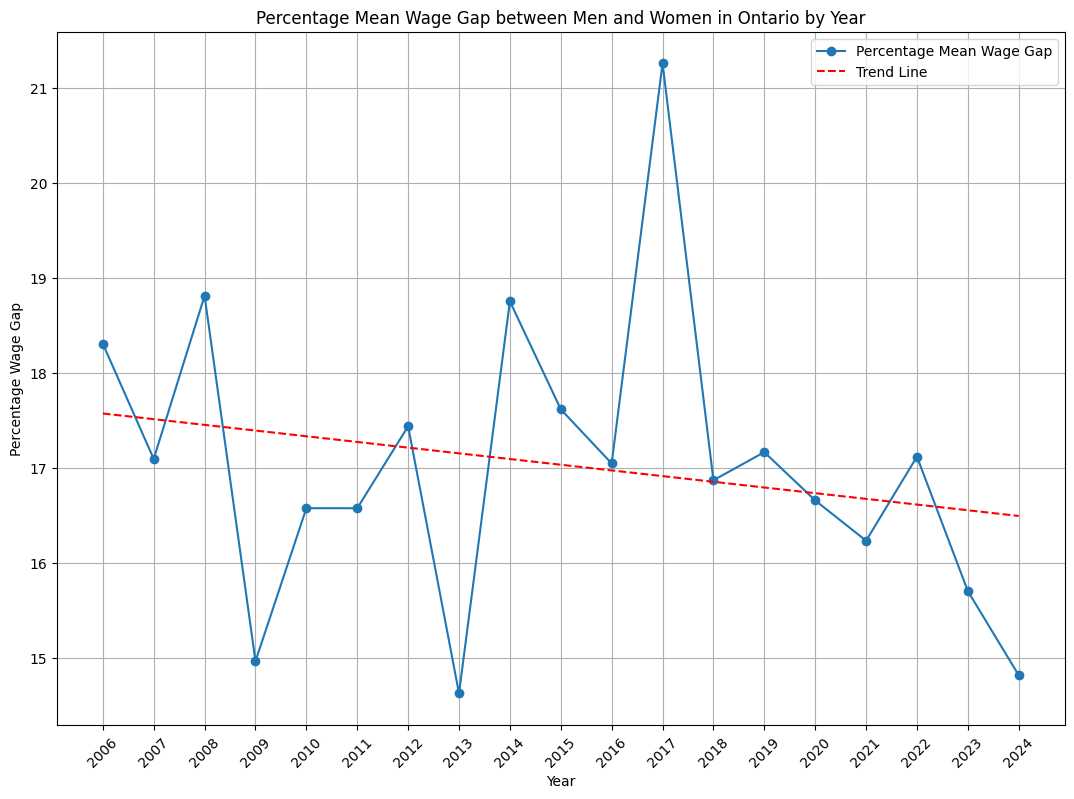

In [22]:
# plot percentage wage gap by year
plt.figure(figsize=(13, 9))
plt.plot(percentage_mean_wage_gap_by_year.index, percentage_mean_wage_gap_by_year.values, marker='o', linestyle='-', label='Percentage Mean Wage Gap')

# Add a trend line
z = np.polyfit(percentage_mean_wage_gap_by_year.index, percentage_mean_wage_gap_by_year.values, 1)
p = np.poly1d(z)
plt.plot(percentage_mean_wage_gap_by_year.index, p(percentage_mean_wage_gap_by_year.index), "r--", label='Trend Line')


plt.xlabel('Year')
plt.ylabel('Percentage Wage Gap')
plt.title('Percentage Mean Wage Gap between Men and Women in Ontario by Year')
plt.xticks(percentage_mean_wage_gap_by_year.index, rotation=45) # Set ticks for every year
plt.grid(True) # Add a grid for better readability
plt.legend()
plt.show()

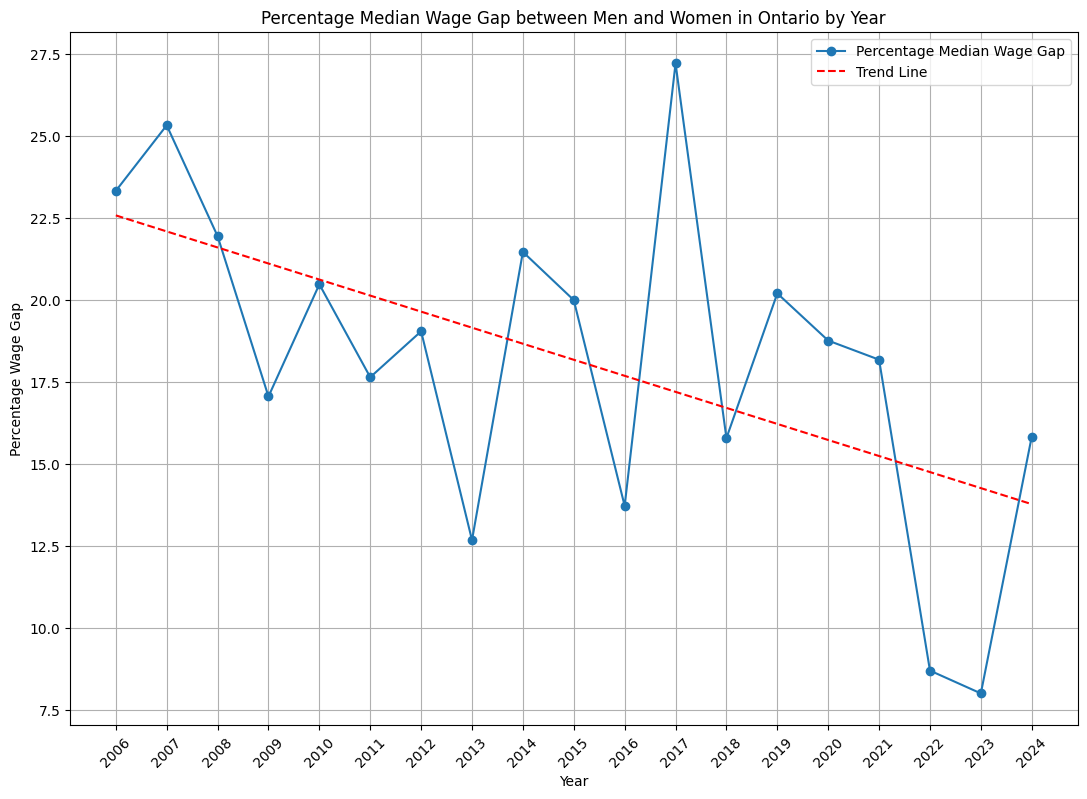

In [23]:
# plot percentage median wage gap by year

plt.figure(figsize=(13, 9))
plt.plot(percentage_median_wage_gap_by_year.index, percentage_median_wage_gap_by_year.values, marker='o', linestyle='-', label='Percentage Median Wage Gap')

# Add a trend line
z = np.polyfit(percentage_median_wage_gap_by_year.index, percentage_median_wage_gap_by_year.values, 1)
p = np.poly1d(z)
plt.plot(percentage_median_wage_gap_by_year.index, p(percentage_median_wage_gap_by_year.index), "r--", label='Trend Line')

plt.xlabel('Year')
plt.ylabel('Percentage Wage Gap')
plt.title('Percentage Median Wage Gap between Men and Women in Ontario by Year')
plt.xticks(percentage_median_wage_gap_by_year.index, rotation=45) # Set ticks for every year
plt.grid(True) # Add a grid for better readability
plt.legend()
plt.show()

With the calculated percentage differences of the mean and median wage of Men and Women, we can see the existing gap appears to be declining over time.

In [24]:
# Apply a linear regression to percentage_mean_wage_gap_by_year
import statsmodels.api as sm

# Prepare data for regression
# The index of the series is the YEAR, which will be our independent variable
X = percentage_mean_wage_gap_by_year.index.values.reshape(-1, 1)
y = percentage_mean_wage_gap_by_year.values

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model_gap_mean = sm.OLS(y, X).fit()

# Print the regression results
print(model_gap_mean.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.8274
Date:                Mon, 10 Nov 2025   Prob (F-statistic):              0.376
Time:                        19:53:50   Log-Likelihood:                -34.493
No. Observations:                  19   AIC:                             72.99
Df Residuals:                      17   BIC:                             74.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.6880    132.643      1.038      0.3

Observations


*   R-squared is 0.046; approximately 4.6% of the variation can be explained by "Gender" and "Year"
*   f-statistic is 0.8274 and prob (f-statistic) / p-value is 0.376, suggesting the regression is not statistically significant
*   Intercept (const) = 137.688, p = 0.314, since p > 0.05, the regression is not statistically significant





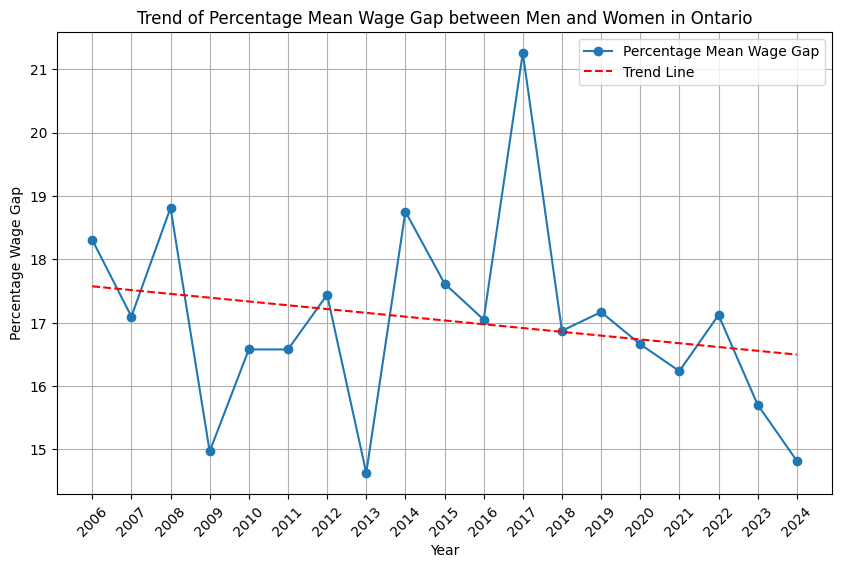

In [25]:
# Plot the trend line for percentage_mean_wage_gap_by_year

# Get the parameters from the fitted model (from cell 2c3ae57e)
intercept = model_gap_mean.params[0] # The constant (intercept) is the first parameter
slope = model_gap_mean.params[1] # The coefficient for YEAR is the second parameter

# Get the years from the index of the series
years = percentage_mean_wage_gap_by_year.index

# Calculate the predicted values (trend line)
predicted_gap = intercept + slope * years

# Plot the original data points
plt.figure(figsize=(10, 6))
plt.plot(years, percentage_mean_wage_gap_by_year.values, marker='o', linestyle='-', label='Percentage Mean Wage Gap')

# Plot the trend line
plt.plot(years, predicted_gap, color='red', linestyle='--', label='Trend Line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Wage Gap')
plt.title('Trend of Percentage Mean Wage Gap between Men and Women in Ontario')
plt.xticks(years, rotation=45) # Set ticks for every year
plt.grid(True) # Add a grid for better readability
plt.legend()
plt.show()

In [26]:
# apply linear regression to percentage_median_wage_gap_by_year

# Prepare data for regression
# The index of the series is the YEAR, which will be our independent variable
X_median = percentage_median_wage_gap_by_year.index.values.reshape(-1, 1)
y_median = percentage_median_wage_gap_by_year.values

# Add a constant to the independent variable for the intercept
X_median = sm.add_constant(X_median)

# Fit the linear regression model
model_gap_median = sm.OLS(y_median, X_median).fit()

# Print the regression results
print(model_gap_median.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     7.294
Date:                Mon, 10 Nov 2025   Prob (F-statistic):             0.0152
Time:                        19:53:57   Log-Likelihood:                -53.736
No. Observations:                  19   AIC:                             111.5
Df Residuals:                      17   BIC:                             113.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1004.4877    365.205      2.750      0.0

Observations


*   R-squared is 0.300; the model explains approximately 30% of the variation
*   f-statistic is 7.294 and prob (f-statistic) / p-value is 0.0152, suggesting the the model is statistically significant
*   Intercept (const) = 1004.49, p = 0.014, since p < 0.05, the regression is statistically significant





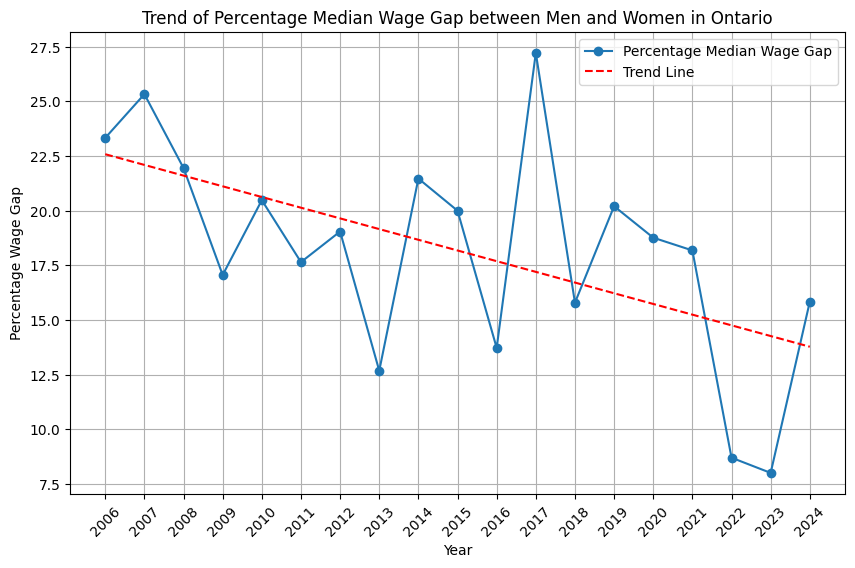

In [27]:
# plot percentage median wage gap by year

# Get the parameters from the fitted model (from cell e85xlResDrU7)
intercept = model_gap_median.params[0] # The constant (intercept) is the first parameter
slope = model_gap_median.params[1] # The coefficient for YEAR is the second parameter

# Get the years from the index of the series
years = percentage_median_wage_gap_by_year.index

# Calculate the predicted values (trend line)
predicted_gap = intercept + slope * years

# Plot the original data points
plt.figure(figsize=(10, 6))
plt.plot(years, percentage_median_wage_gap_by_year.values, marker='o', linestyle='-', label='Percentage Median Wage Gap')

# Plot the trend line
plt.plot(years, predicted_gap, color='red', linestyle='--', label='Trend Line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Wage Gap')
plt.title('Trend of Percentage Median Wage Gap between Men and Women in Ontario')
plt.xticks(years, rotation=45) # Set ticks for every year
plt.grid(True) # Add a grid for better readability
plt.legend()
plt.show()

From the linear regression model, both the mean and median percentage wage gap appear to be declining, meaning the gap seems to be narrowing.

The median percentage wage gap seems to be narrowing at a greater rate than the mean percentage.

*Validate our model using K-Fold Cross-Validation.*

In [28]:
# Use K-fold cross-validation to validate regression model of mean wage gap

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit # Import TimeSeriesSplit

# Prepare data for regression (from cell 2c3ae57e)
X = percentage_mean_wage_gap_by_year.index.values.reshape(-1, 1)
y = percentage_mean_wage_gap_by_year.values

# Initialize the linear regression model
model = LinearRegression()

# Define the number of splits for time series cross-validation
n_splits = 5 # You can change the number of splits as needed
tscv = TimeSeriesSplit(n_splits=n_splits) # Use TimeSeriesSplit

# Perform Time Series cross-validation
# We will use the negative mean squared error as the scoring metric
# cross_val_score returns negative values for error metrics, so we take the absolute value
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=tscv)
mse_scores = -scores

# Print the results
print(f"Cross-validation results (Mean Squared Error) with {n_splits} splits:")
print(f"Individual MSE scores: {mse_scores}")
print(f"Mean MSE: {np.mean(mse_scores):.4f}")
print(f"Standard deviation of MSE: {np.std(mse_scores):.4f}")

Cross-validation results (Mean Squared Error) with 5 splits:
Individual MSE scores: [7.22586121 4.35227065 6.77123388 2.09175509 2.85441734]
Mean MSE: 4.6591
Standard deviation of MSE: 2.0490


Observations

*   Mean MS is 4.6591
*   Standard deviation of MSE: 2.0490



In [29]:
# Use K-fold cross-validation to validate regression model of median wage gap

# Prepare data for regression (from cell e85xlResDrU7)
X_median = percentage_median_wage_gap_by_year.index.values.reshape(-1, 1)
y_median = percentage_median_wage_gap_by_year.values

# Initialize the linear regression model
model_median = LinearRegression()

# Define the number of splits for time series cross-validation
n_splits = 5 # You can change the number of splits as needed
tscv_median = TimeSeriesSplit(n_splits=n_splits) # Use TimeSeriesSplit

# Perform Time Series cross-validation
# We will use the negative mean squared error as the scoring metric
# cross_val_score returns negative values for error metrics, so we take the absolute value
scores_median = cross_val_score(model_median, X_median, y_median, scoring='neg_mean_squared_error', cv=tscv_median)
mse_scores_median = -scores_median

# Print the results
print(f"Cross-validation results (Mean Squared Error) for median wage gap with {n_splits} splits:")
print(f"Individual MSE scores: {mse_scores_median}")
print(f"Mean MSE: {np.mean(mse_scores_median):.4f}")
print(f"Standard deviation of MSE: {np.std(mse_scores_median):.4f}")

Cross-validation results (Mean Squared Error) for median wage gap with 5 splits:
Individual MSE scores: [26.62789623 27.79295166 45.10809607  4.93346516 56.66992236]
Mean MSE: 32.2265
Standard deviation of MSE: 17.6597


Observations

*   Mean MS is 32.2265
*   Standard deviation of MSE: 17.6597

Both models have moderate accuracy, however, they are both not consistently reliable. As the data set we are working with is aggregated (calculated mean and median difference), resulting in a smaller sample size, this may be causing the models to be unreliable.

# **Research Question 3**

Examine wage trends across the different subgroups between genders to determine influence of immigration status on wage gap

Method: Apply decision tree model to analyze gender wage gaps across the different immigrant subgroups and validate model using K-Fold Cross-Validation

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Filter out suppressed wage values for both men and women
df_filtered = df_ontario[
    (df_ontario['Men_Wage_is_suppressed'] == False) &
    (df_ontario['Women_Wage_is_suppressed'] == False)
].copy()

# Create a 'wage_gap' target variable
df_filtered['wage_gap'] = df_filtered['Men_Wage'] - df_filtered['Women_Wage']

# Select features
features = ['YEAR', 'IMMIGRANT', 'Men_Wage', 'Women_Wage']
target = 'wage_gap'

X = df_filtered[features]
y = df_filtered[target]

# Identify categorical columns for encoding
categorical_features = ['IMMIGRANT'] # Only 'IMMIGRANT' is categorical in the updated features list

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns ('YEAR', 'Men_Wage', 'Women_Wage') as they are
)

# Create a pipeline with the preprocessor and the Decision Tree Regressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor(random_state=42))])

# Define the number of splits for K-Fold Cross-Validation
n_splits = 5 # You can change the number of splits as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) # Use KFold for general cross-validation

# Perform K-Fold Cross-Validation
# We will use the negative mean squared error as the scoring metric
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=kf)
mse_scores = -scores

# Print the results
print(f"Cross-validation results (Mean Squared Error) for Decision Tree Regressor with {n_splits} folds:")
print(f"Individual MSE scores: {mse_scores}")
print(f"Mean MSE: {np.mean(mse_scores):.4f}")
print(f"Standard deviation of MSE: {np.std(mse_scores):.4f}")

# You can also fit the model on the entire dataset to examine feature importances
pipeline.fit(X, y)

# Get feature importances from the trained model
# Need to get the feature names after one-hot encoding
encoded_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
passthrough_features = [col for col in features if col not in categorical_features]
all_feature_names = np.concatenate([encoded_feature_names, passthrough_features])

feature_importances = pd.Series(pipeline.named_steps['regressor'].feature_importances_, index=all_feature_names)
sorted_feature_importances = feature_importances.sort_values(ascending=False)

print("\nFeature Importances (Top 10) for predicting Wage Gap:")
print(sorted_feature_importances.head(10))

Cross-validation results (Mean Squared Error) for Decision Tree Regressor with 5 folds:
Individual MSE scores: [0.07235922 0.05322654 0.03345096 0.08072839 0.06082875]
Mean MSE: 0.0601
Standard deviation of MSE: 0.0163

Feature Importances (Top 10) for predicting Wage Gap:
Men_Wage                                          0.547634
Women_Wage                                        0.450986
YEAR                                              0.000895
IMMIGRANT_ Total Landed Immigrants                0.000201
IMMIGRANT_ Non-landed immigrants                  0.000090
IMMIGRANT_   Established immigrants, 10+ years    0.000056
IMMIGRANT_   Recent immigrants, 5+ to 10 years    0.000044
IMMIGRANT_ Born in Canada                         0.000032
IMMIGRANT_  Recent immigrants 5+ years            0.000025
IMMIGRANT_Total                                   0.000025
dtype: float64


The decision tree model shows very small numbers for all the immigrant categories, suggesting negligible impact on wages. The value is not 0, but the immigrant categories don’t seem to add predictive value. The K-fold cross-validation seems suggests the model is moderately accurate and reliable.

# **Research Question 4**

Verify the correlation between education levels and wages between genders.

Method: Conduct a correlation analysis using Pearson correlation between education level and wages for each gender.

Use ANCOVA (analysis of covariance) to verify the effects of education levels on wages between genders.

In [31]:
# One-hot encode the 'EDUCATION' column from the original df_ontario
df_ontario_education_encoded = pd.get_dummies(df_ontario, columns=['EDUCATION'], drop_first=True)

# Select the columns of interest: encoded education levels, Men_Wage, Women_Wage, and YEAR
education_cols = [col for col in df_ontario_education_encoded.columns if 'EDUCATION_' in col]
correlation_cols = education_cols + ['Men_Wage', 'Women_Wage', 'YEAR']

# Calculate the correlation matrix for the selected columns
correlation_matrix_education_wages_year = df_ontario_education_encoded[correlation_cols].corr()

# Display the correlation matrix
display(correlation_matrix_education_wages_year)

,EDUCATION_ Bachelor's degree,EDUCATION_ 0 - 8 years,EDUCATION_ High school graduate,EDUCATION_ Post-secondary certificate or diploma,EDUCATION_ Some high school,EDUCATION_ Some post-secondary,EDUCATION_ University degree,"EDUCATION_Total, all education levels",Men_Wage,Women_Wage,YEAR
EDUCATION_ Bachelor's degree,1.000000e+00,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,0.146492,0.196122,-2.102224e-16
EDUCATION_ 0 - 8 years,-1.250000e-01,1.000000e+00,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-0.277711,-0.360299,-1.060560e-15
EDUCATION_ High school graduate,-1.250000e-01,-1.250000e-01,1.000000e+00,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-0.090160,-0.109367,-6.382926e-16
EDUCATION_ Post-secondary certificate or diploma,-1.250000e-01,-1.250000e-01,-1.250000e-01,1.000000e+00,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,0.006639,0.036347,-8.347039e-16
EDUCATION_ Some high school,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,1.000000e+00,-1.250000e-01,-1.250000e-01,-1.250000e-01,-0.219938,-0.287164,-1.118269e-15
EDUCATION_ Some post-secondary,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,1.000000e+00,-1.250000e-01,-1.250000e-01,-0.191635,-0.202056,-1.931361e-16
EDUCATION_ University degree,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,1.000000e+00,-1.250000e-01,0.235688,0.271631,-6.369096e-16
"EDUCATION_Total, all education levels",-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,1.000000e+00,0.088542,0.096583,3.195423e-16
Men_Wage,1.464917e-01,-2.777110e-01,-9.015991e-02,6.639047e-03,-2.199384e-01,-1.916353e-01,2.356885e-01,8.854166e-02,1.000000,0.871257,2.020610e-01
Women_Wage,1.961218e-01,-3.602992e-01,-1.093668e-01,3.634654e-02,-2.871640e-01,-2.020557e-01,2.716306e-01,9.658311e-02,0.871257,1.000000,2.006960e-01


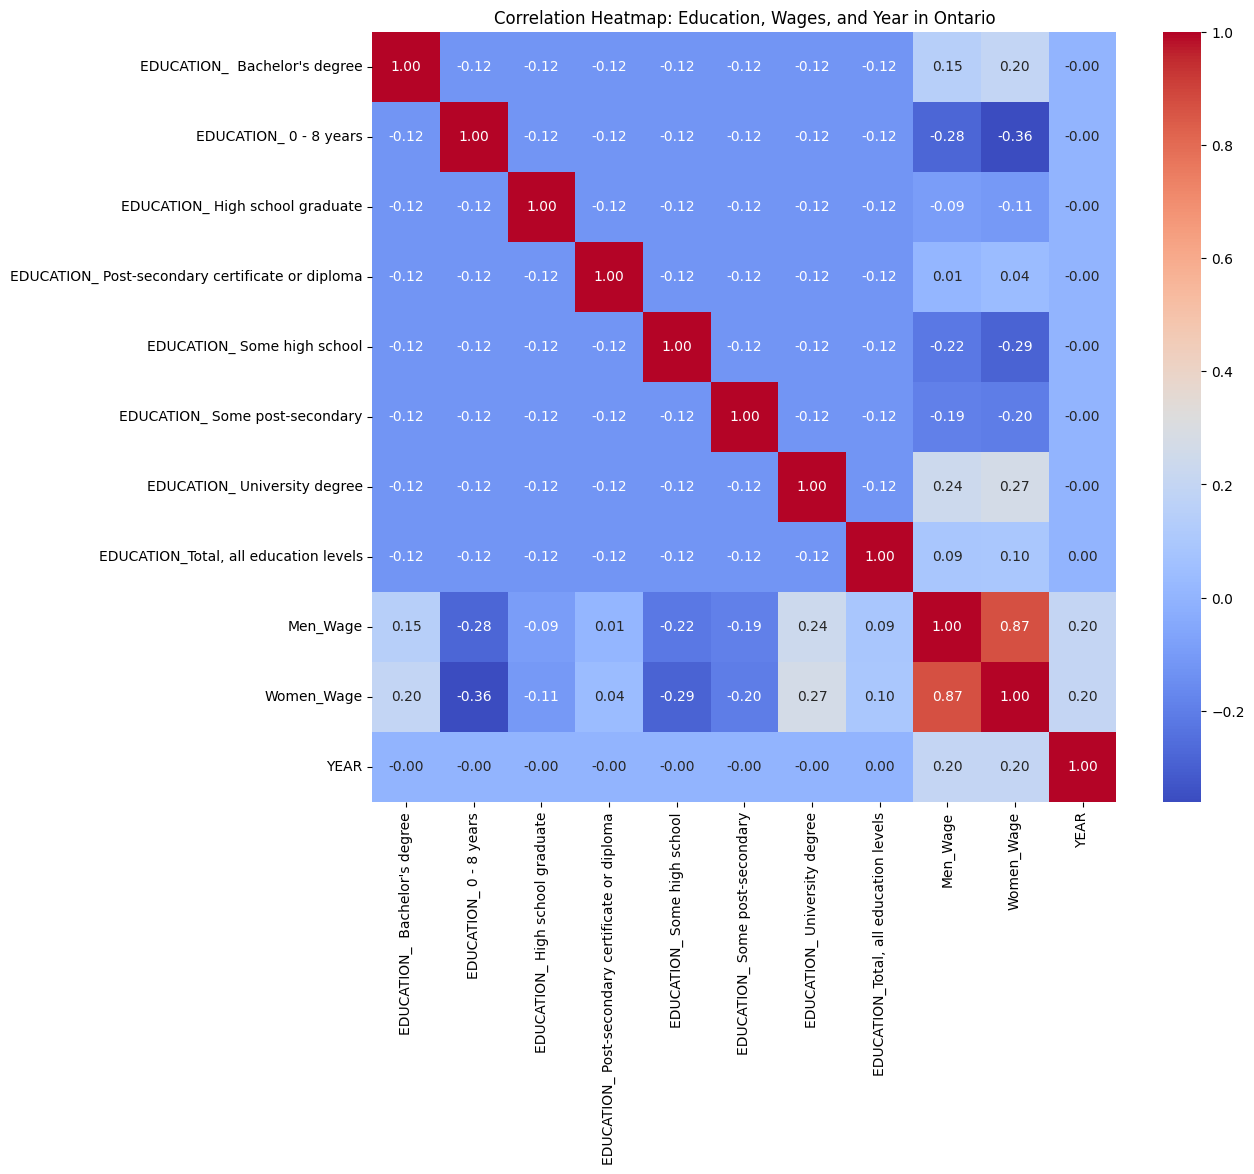

In [32]:
# Generate a heatmap of the education correlation matrix
plt.figure(figsize=(12, 10)) # Adjust the figure size for better readability
sns.heatmap(correlation_matrix_education_wages_year, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Education, Wages, and Year in Ontario')
plt.show()

Based on the correlation_matrix_education_wages_year:



*   There is a positive correlation between having a 'University degree' and both 'Men_Wage' (0.24) and 'Women_Wage' (0.27)
*   'Bachelor's degree' shows a positive correlation with bot 'Men_Wage" (0.15) and "Women_Wage" (0.20), although slightly lower

This suggests that individuals with a university degree or Bachelor's degree tend to have higher wages.



*   There is a negative correlation between having education '0 - 8 years' with both 'Men_Wage' (-0.28) and 'Women_Wage' (-0.36)
*   There is a negative correlation also between having 'Some high school' with both 'Men_Wage' (-0.22) and 'Women_Wage' (-0.29)

This suggests that individuals with lower levels of education tend to have lower wages.

Other education levels like 'High school graduate', 'Post-secondary certificate or diploma', and 'Some post-secondary' show weaker correlations with wages, both positive and negative, depending on the specific category and gender.

The strength of the correlation might seems to differ slightly. For example, having a 'University degree' appears to have a slightly stronger positive correlation with 'Women_Wage' (0.27) compared to 'Men_Wage' (0.24). Conversely, '0 - 8 years' of education has a stronger negative correlation with 'Women_Wage' (-0.36) compared to 'Men_Wage' (-0.28).


In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Prepare data for ANCOVA
# We will perform separate ANCOVA for Men's Wage and Women's Wage, with Education as the covariate

# Ensure 'EDUCATION' is treated as a categorical variable for the model formula
df_ontario['EDUCATION'] = df_ontario['EDUCATION'].astype('category')

# ANCOVA for Men's Wage with Education as covariate
# Formula: Men_Wage ~ C(EDUCATION)
# C() is used to treat EDUCATION as a categorical variable
model_men_ancova = ols('Men_Wage ~ C(EDUCATION)', data=df_ontario).fit()
anova_table_men = sm.stats.anova_lm(model_men_ancova, typ=2) # Use type 2 ANOVA for unbalanced designs

print("ANCOVA Results for Men's Wage with Education as Covariate:")
print(anova_table_men)

# ANCOVA for Women's Wage with Education as covariate
# Formula: Women_Wage ~ C(EDUCATION)
model_women_ancova = ols('Women_Wage ~ C(EDUCATION)', data=df_ontario).fit()
anova_table_women = sm.stats.anova_lm(model_women_ancova, typ=2) # Use type 2 ANOVA for unbalanced designs

print("\nANCOVA Results for Women's Wage with Education as Covariate:")
print(anova_table_women)

ANCOVA Results for Men's Wage with Education as Covariate:
                    sum_sq       df            F  PR(>F)
C(EDUCATION)  9.457023e+05      8.0  1141.129619     0.0
Residual      2.124791e+06  20511.0          NaN     NaN

ANCOVA Results for Women's Wage with Education as Covariate:
                    sum_sq       df            F  PR(>F)
C(EDUCATION)  9.768410e+05      8.0  2174.466505     0.0
Residual      1.151776e+06  20511.0          NaN     NaN


/tmp/ipython-input-1310997702.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ontario['EDUCATION'] = df_ontario['EDUCATION'].astype('category')


output interpretation: ..